In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
pwd

'/home/tkd_010/ImageProcessing'

In [5]:
path = './data/images/binary_img.jpg'

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

ret, threshold = cv2.threshold(img, 120, 255, 0)
contours, hierarchy = cv2.findContours(threshold, 
                                       cv2.RETR_LIST,
                                       cv2.CHAIN_APPROX_SIMPLE)

In [11]:
cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'m00': 1821.5, 'm10': 78581.83333333333, 'm01': 558225.6666666666, 'm20': 3667084.25, 'm11': 24082347.041666664, 'm02': 171351889.0833333, 'm30': 182110324.95000002, 'm21': 1123807632.7666667, 'm12': 7392193226.066667, 'm03': 52682104034.8, 'mu20': 276963.7284365762, 'mu11': -220.23826134949923, 'mu02': 275361.5371107757, 'mu30': 10495.991693764925, 'mu21': -5673.149550139904, 'mu12': -10838.713889047503, 'mu03': 1222.0673751831055, 'nu20': 0.08347656037756726, 'nu11': -6.63795675512144e-05, 'nu02': 0.0829936616900764, 'nu30': 7.412258203278676e-05, 'nu21': -4.006372196009955e-05, 'nu12': -7.65428825413495e-05, 'nu03': 8.630226843682836e-06}


In [12]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)   ## Central moment

43 306


In [14]:
perimeter = cv2.arcLength(contours[0], True)
print(perimeter)  ## contour의 둘레

180.81118214130402


In [19]:
app_rate = 0.05
epsilon = app_rate * cv2.arcLength(contours[0], True)
approx = cv2.approxPolyDP(contours[0],   
                          epsilon,
                          True)

# plt.imshow(approx)
print(approx)

[[[ 28 281]]

 [[ 17 321]]

 [[ 58 332]]

 [[ 69 291]]]


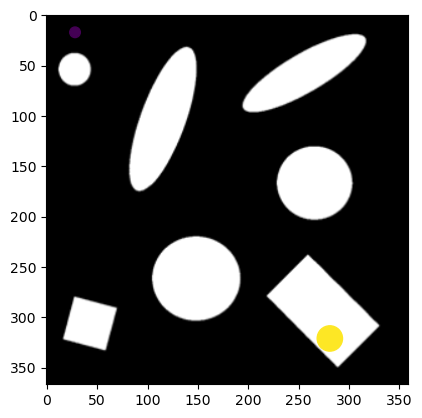

In [30]:
plt.figure()
plt.imshow(img, cmap='gray')
plt.scatter(*approx)
plt.show()